# 特征工程

## 1. 特征提取
将任意数据（文本、图像等）转换为可用于机器学习的数字特征

### 1.1 字典特征提取

In [1]:
from sklearn.feature_extraction import DictVectorizer

In [2]:
data = [{'city': '北京','temperature':100}, 
        {'city': '上海','temperature':60}, 
        {'city': '深圳','temperature':30}]

# 1、实例化一个转换器类
transfer = DictVectorizer(sparse=True)

# 2、调用fit_transform()
data_new = transfer.fit_transform(data)
print("data_new:\n", data_new.toarray(), type(data_new))
print("特征名字：\n", transfer.get_feature_names_out())

data_new:
 [[  0.   1.   0. 100.]
 [  1.   0.   0.  60.]
 [  0.   0.   1.  30.]] <class 'scipy.sparse._csr.csr_matrix'>
特征名字：
 ['city=上海' 'city=北京' 'city=深圳' 'temperature']


### 1.2 文本特征提取

#### 1.2.1 CountVectorizer: 统计词频, 忽略单个字符

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
data = ["Life is short,I like python", "Life is too long,I dislike python"]

# 1、实例化一个转换器类, stop_words为停用词，剔除一些无用词
transfer = CountVectorizer(stop_words=["is", "too"])

# 2、调用fit_transform
data_new = transfer.fit_transform(data)
print("data_new:\n", data_new.toarray())
print("特征名字：\n", transfer.get_feature_names_out())

data_new:
 [[0 1 1 0 1 1]
 [1 1 0 1 1 0]]
特征名字：
 ['dislike' 'life' 'like' 'long' 'python' 'short']


In [5]:
# 中文文本数据如果不采用空格或符号分开，会将一整个句子当作一个字
data = ["我爱北京天安门", "天安门上太阳升"]
# 1、实例化一个转换器类
transfer = CountVectorizer()

# 2、调用fit_transform
data_new = transfer.fit_transform(data)
print("data_new:\n", data_new.toarray())
print("特征名字：\n", transfer.get_feature_names_out())

data_new:
 [[0 1]
 [1 0]]
特征名字：
 ['天安门上太阳升' '我爱北京天安门']


In [6]:
# 需要对中文句子进行分词处理
data = ["我 爱 北京 天安门", "天安门 上 太阳 升"]
# 1、实例化一个转换器类
transfer = CountVectorizer()

# 2、调用fit_transform
data_new = transfer.fit_transform(data)
print("data_new:\n", data_new.toarray())
print("特征名字：\n", transfer.get_feature_names_out())

data_new:
 [[1 1 0]
 [0 1 1]]
特征名字：
 ['北京' '天安门' '太阳']


In [7]:
# 使用jieba自动分词
import jieba
data = ["一种还是一种今天很残酷，明天更残酷，后天很美好，但绝对大部分是死在明天晚上，所以每个人不要放弃今天。",
        "我们看到的从很远星系来的光是在几百万年之前发出的，这样当我们看到宇宙时，我们是在看它的过去。",
        "如果只用一种方式了解某样事物，你就不会真正了解它。了解事物真正含义的秘密取决于如何将其与我们所了解的事物相联系。"]

# 1、分词
data_new = []
for i in range(len(data)):
    data_new.append(' '.join(list(jieba.cut(data[i]))))

transfer = CountVectorizer(stop_words=["一种", "所以"])

# 2、调用fit_transform
data_final = transfer.fit_transform(data_new)
print("data_new:\n", data_final.toarray())
print("特征名字：\n", transfer.get_feature_names_out())

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache


Loading model cost 0.435 seconds.
Prefix dict has been built successfully.


data_new:
 [[0 1 0 0 0 2 0 0 0 0 0 1 0 1 0 0 0 0 1 0 2 0 1 0 2 1 0 0 0 1 1 0 0 1 0]
 [0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 3 0 0 0 1 0 0 0 0 2 0 0 0 0 0 1 0 1]
 [1 0 0 4 3 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 2 1 0 0 1 0 0 0]]
特征名字：
 ['不会' '不要' '之前' '了解' '事物' '今天' '光是在' '几百万年' '发出' '取决于' '只用' '后天' '含义'
 '大部分' '如何' '如果' '宇宙' '我们' '放弃' '方式' '明天' '星系' '晚上' '某样' '残酷' '每个' '看到'
 '真正' '秘密' '绝对' '美好' '联系' '过去' '还是' '这样']


#### 1.2.2 TfidfVectorizer: 
- tf: term frequency,词频=某个词在该文本中出现的次数/该文本中所有词的总数
- idf: inverse document frequency,逆向文档频率=log10(总文件数目/包含该词语的文件数)
- tf*idf: 希望词在一个类别文章中出现的频率很高，在其他类别的文章中那个出现的频率很低,以便于得到更具有代表性的关键词

In [8]:
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
data = ["一种还是一种今天很残酷，明天更残酷，后天很美好，但绝对大部分是死在明天晚上，所以每个人不要放弃今天。",
        "我们看到的从很远星系来的光是在几百万年之前发出的，这样当我们看到宇宙时，我们是在看它的过去。",
        "如果只用一种方式了解某样事物，你就不会真正了解它。了解事物真正含义的秘密取决于如何将其与我们所了解的事物相联系。"]

# 1、分词
data_new = []
for i in range(len(data)):
    data_new.append(' '.join(list(jieba.cut(data[i]))))

transfer = TfidfVectorizer(stop_words=["一种", "所以"])

# 2、调用fit_transform
data_final = transfer.fit_transform(data_new)
print("data_new:\n", data_final.toarray())
print("特征名字：\n", transfer.get_feature_names_out())

data_new:
 [[0.         0.21821789 0.         0.         0.         0.43643578
  0.         0.         0.         0.         0.         0.21821789
  0.         0.21821789 0.         0.         0.         0.
  0.21821789 0.         0.43643578 0.         0.21821789 0.
  0.43643578 0.21821789 0.         0.         0.         0.21821789
  0.21821789 0.         0.         0.21821789 0.        ]
 [0.         0.         0.2410822  0.         0.         0.
  0.2410822  0.2410822  0.2410822  0.         0.         0.
  0.         0.         0.         0.         0.2410822  0.55004769
  0.         0.         0.         0.2410822  0.         0.
  0.         0.         0.48216441 0.         0.         0.
  0.         0.         0.2410822  0.         0.2410822 ]
 [0.15895379 0.         0.         0.63581516 0.47686137 0.
  0.         0.         0.         0.15895379 0.15895379 0.
  0.15895379 0.         0.15895379 0.15895379 0.         0.12088845
  0.         0.15895379 0.         0.         0.     

## 2. 特征预处理
无量纲化处理，避免一些特征数值过大使得模型无法对其他特征进行有效的学习

### 2.1 归一化
归一化的鲁棒性较差，容易受数据中出现异常点的影响，适合处理规模较小的数据

In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [6]:
data = pd.read_csv("data/dating.txt")
data = data.iloc[:, :3]
print("data:\n", data)

# 1、实例化一个转换器类,将特征值放缩到feature_range
transfer = MinMaxScaler(feature_range=(2, 3))

# 2、调用fit_transform
data_new = transfer.fit_transform(data)
print("data_new:\n", data_new)

data:
      milage     Liters  Consumtime
0     40920   8.326976    0.953952
1     14488   7.153469    1.673904
2     26052   1.441871    0.805124
3     75136  13.147394    0.428964
4     38344   1.669788    0.134296
..      ...        ...         ...
995   11145   3.410627    0.631838
996   68846   9.974715    0.669787
997   26575  10.650102    0.866627
998   48111   9.134528    0.728045
999   43757   7.882601    1.332446

[1000 rows x 3 columns]
data_new:
 [[2.44832535 2.39805139 2.56233353]
 [2.15873259 2.34195467 2.98724416]
 [2.28542943 2.06892523 2.47449629]
 ...
 [2.29115949 2.50910294 2.51079493]
 [2.52711097 2.43665451 2.4290048 ]
 [2.47940793 2.3768091  2.78571804]]


### 2.2 标准化
在样本较多的情况下比较稳定，适合处理现代嘈杂大数据场景

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [10]:
data = pd.read_csv("data/dating.txt")
data = data.iloc[:, :3]
print("data:\n", data)

# 1、实例化一个转换器类
transfer = StandardScaler()

# 2、调用fit_transform
data_new = transfer.fit_transform(data)
print("data_new:\n", data_new)

data:
      milage     Liters  Consumtime
0     40920   8.326976    0.953952
1     14488   7.153469    1.673904
2     26052   1.441871    0.805124
3     75136  13.147394    0.428964
4     38344   1.669788    0.134296
..      ...        ...         ...
995   11145   3.410627    0.631838
996   68846   9.974715    0.669787
997   26575  10.650102    0.866627
998   48111   9.134528    0.728045
999   43757   7.882601    1.332446

[1000 rows x 3 columns]
data_new:
 [[ 0.33193158  0.41660188  0.24523407]
 [-0.87247784  0.13992897  1.69385734]
 [-0.34554872 -1.20667094 -0.05422437]
 ...
 [-0.32171752  0.96431572  0.06952649]
 [ 0.65959911  0.60699509 -0.20931587]
 [ 0.46120328  0.31183342  1.00680598]]


## 3. 特征降维
在某些限定条件下，降低随机变量特征的个数，得到一组不相关的主变量

### 3.1 特征选择
数据中包含冗余或相关特征，旨在从原有特征中找到主要特征
- filter（过滤式）
    - 方差选择法：低方差过滤（某个特征值在大多数样本的值比较接近）
    - 相关系数：特征之间的相关程度
- embeded（嵌入式）——算法自动选择特征
    - 决策树：信息熵
    - 正则化：L1，L2
    - 深度学习：卷积等

#### 3.1.1 低方差过滤
sklearn.feature_selection.VarianceThreshold(threshold=0.0), 只保留方差大于threshold的特征

In [5]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

In [9]:
data = pd.read_csv("data/factor_returns.csv")
data = data.iloc[:, 1:-2]
print("data:\n", data)

# 1、实例化一个转换器类
transfer = VarianceThreshold(threshold=10)

# 2、调用fit_transform
data_new = transfer.fit_transform(data)
print("data_new:\n", data_new, data_new.shape)

data:
       pe_ratio  pb_ratio    market_cap  return_on_asset_net_profit  \
0       5.9572    1.1818  8.525255e+10                      0.8008   
1       7.0289    1.5880  8.411336e+10                      1.6463   
2    -262.7461    7.0003  5.170455e+08                     -0.5678   
3      16.4760    3.7146  1.968046e+10                      5.6036   
4      12.5878    2.5616  4.172721e+10                      2.8729   
...        ...       ...           ...                         ...   
2313   25.0848    4.2323  2.274800e+10                     10.7833   
2314   59.4849    1.6392  2.281400e+10                      1.2960   
2315   39.5523    4.0052  1.702434e+10                      3.3440   
2316   52.5408    2.4646  3.287910e+10                      2.7444   
2317   14.2203    1.4103  5.911086e+10                      2.0383   

      du_return_on_equity            ev  earnings_per_share       revenue  \
0                 14.9403  1.211445e+12              2.0100  2.070140e+10  

#### 3.1.2 相关系数
- 相关系数的值r位于-1~1之间
    - r>0:正相关
    - r<0:负相关
    - |r|越大，相关性越大
- 如果相关系数很高：
    - 选择其中一个特征
    - 加权求和得到新的特征

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

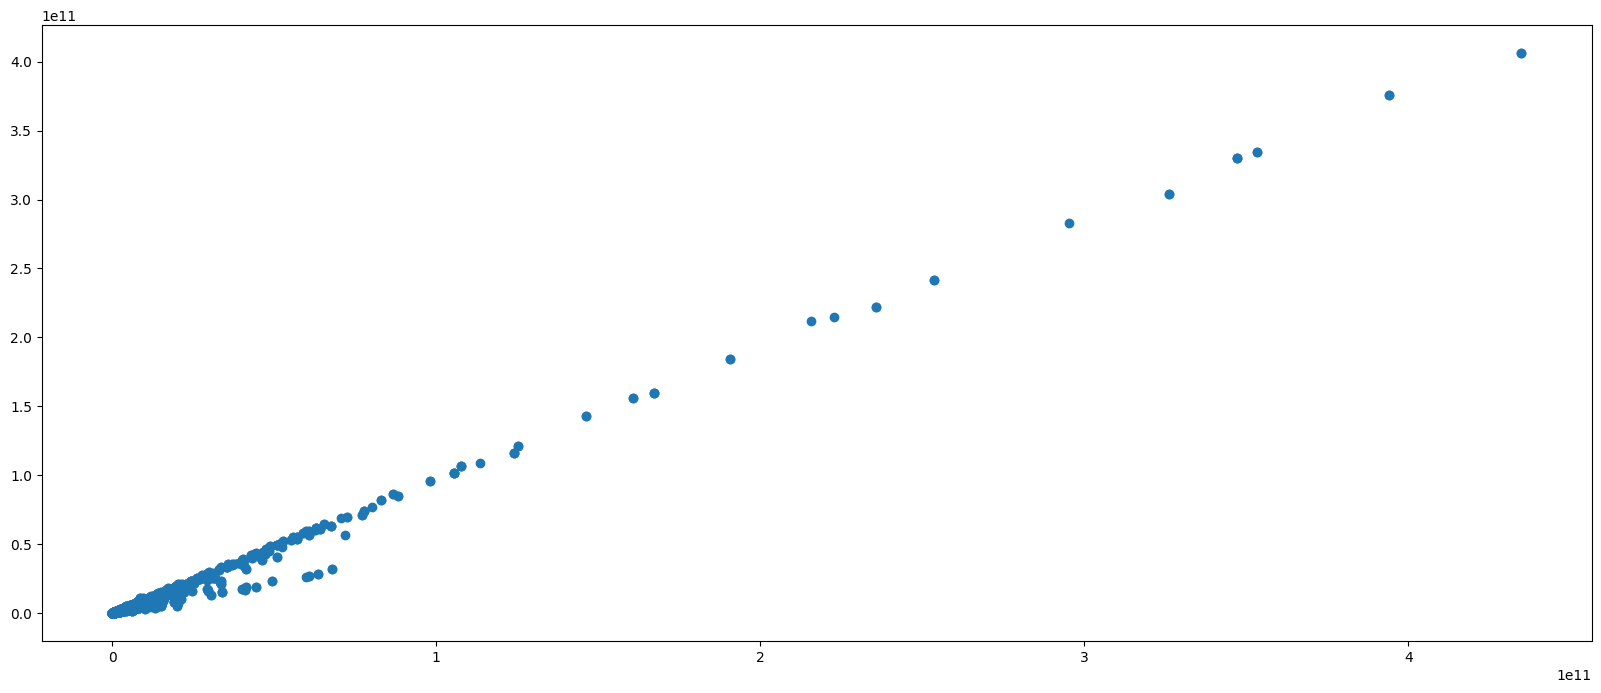

revenue与total_expense之间的相关性：
 PearsonRResult(statistic=-0.004389322779936274, pvalue=0.8327205496590737)


In [12]:
data = pd.read_csv("data/factor_returns.csv")
data = data.iloc[:, 1:-2]

# 1、绘制散点图
plt.figure(figsize=[20,8])
plt.scatter(data['revenue'], data['total_expense'])
plt.show()

# 2、计算某两个变量之间的相关系数
r1 = pearsonr(data["pe_ratio"], data["pb_ratio"])
print("revenue与total_expense之间的相关性：\n", r1)

### 3.2 主成分分析（PCA，Principal Component Analysis）
将高维数据转化为低维数据，在损失少量信息的代价上，尽可能的降低数据的维度（复杂性）  
sklearn.decomposition.PCA(n_components=None), n_components:  
- 小数：表示保留占比多少的信息
- 整数：减少到几维特征

In [13]:
from sklearn.decomposition import PCA

In [15]:
data = [[2,8,4,5], [6,3,0,8], [5,4,9,1]]

# 1、实例化一个转换器类
transfer = PCA(n_components=2)

# 2、调用fit_transform
data_new = transfer.fit_transform(data)
print("data_new:\n", data_new)

data_new:
 [[ 1.28620952e-15  3.82970843e+00]
 [ 5.74456265e+00 -1.91485422e+00]
 [-5.74456265e+00 -1.91485422e+00]]
